# Data Science Capstone Project
#### Noelle Reid

## Data Cleaning & Preprocessing

In [87]:
# load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import time

In [5]:
# import dataset
df = pd.read_csv('/Users/noellereid/Desktop/SPRING 2025/DS 480/SleepStudy.csv', header=0, sep = ",")

In [6]:
# preview first five observations
df.head()

,Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,...,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,0,4,Neither,0,0,3.60,0,-0.26,4,4,...,Moderate,10,25.75,8.70,7.70,25.75,9.50,5.88,7.18,0
1,0,4,Neither,2,1,3.24,0,1.39,6,1,...,Moderate,6,25.70,8.20,6.80,26.00,10.00,7.25,6.93,0
2,0,4,Owl,0,0,2.97,12,0.38,18,18,...,Light,3,27.44,6.55,3.00,28.00,12.59,10.09,5.02,0
3,0,1,Lark,5,1,3.76,0,1.39,9,1,...,Light,2,23.50,7.17,6.77,27.00,8.00,7.25,6.90,0
4,0,4,Owl,0,0,3.20,4,1.22,9,7,...,Moderate,4,25.90,8.67,6.09,23.75,9.50,7.00,6.35,0


#### Data Types / Null Values

In [7]:
# no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            253 non-null    int64  
 1   ClassYear         253 non-null    int64  
 2   LarkOwl           253 non-null    object 
 3   NumEarlyClass     253 non-null    int64  
 4   EarlyClass        253 non-null    int64  
 5   GPA               253 non-null    float64
 6   ClassesMissed     253 non-null    int64  
 7   CognitionZscore   253 non-null    float64
 8   PoorSleepQuality  253 non-null    int64  
 9   DepressionScore   253 non-null    int64  
 10  AnxietyScore      253 non-null    int64  
 11  StressScore       253 non-null    int64  
 12  DepressionStatus  253 non-null    object 
 13  AnxietyStatus     253 non-null    object 
 14  Stress            253 non-null    object 
 15  DASScore          253 non-null    int64  
 16  Happiness         253 non-null    int64  
 1

#### Create Dummy Variables

In [8]:
df = pd.get_dummies(df, columns=['LarkOwl','DepressionStatus','AnxietyStatus','Stress','AlcoholUse'], drop_first = True)
df.head()

,Gender,ClassYear,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,...,LarkOwl_Neither,LarkOwl_Owl,DepressionStatus_normal,DepressionStatus_severe,AnxietyStatus_normal,AnxietyStatus_severe,Stress_normal,AlcoholUse_Heavy,AlcoholUse_Light,AlcoholUse_Moderate
0,0,4,0,0,3.60,0,-0.26,4,4,3,...,True,False,True,False,True,False,True,False,False,True
1,0,4,2,1,3.24,0,1.39,6,1,0,...,True,False,True,False,True,False,True,False,False,True
2,0,4,0,0,2.97,12,0.38,18,18,18,...,False,True,False,False,False,True,True,False,True,False
3,0,1,5,1,3.76,0,1.39,9,1,4,...,False,False,True,False,True,False,True,False,True,False
4,0,4,0,0,3.20,4,1.22,9,7,25,...,False,True,True,False,False,True,True,False,False,True


#### Check for Duplicate Observations

In [9]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Gender, ClassYear, NumEarlyClass, EarlyClass, GPA, ClassesMissed, CognitionZscore, PoorSleepQuality, DepressionScore, AnxietyScore, StressScore, DASScore, Happiness, Drinks, WeekdayBed, WeekdayRise, WeekdaySleep, WeekendBed, WeekendRise, WeekendSleep, AverageSleep, AllNighter, LarkOwl_Neither, LarkOwl_Owl, DepressionStatus_normal, DepressionStatus_severe, AnxietyStatus_normal, AnxietyStatus_severe, Stress_normal, AlcoholUse_Heavy, AlcoholUse_Light, AlcoholUse_Moderate]
Index: []

[0 rows x 32 columns]


## Exploratory Data Analysis

### PCA : Identifying Outliers

In [10]:
# load necessary libararies
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
X = pd.read_csv('/Users/noellereid/Desktop/SPRING 2025/DS 480/SleepStudy.csv', header=0, sep = ",")
# select numerical features
features = df.select_dtypes(include=[np.number])
# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [12]:
# initialize PCA
pca = PCA()
pca.fit(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [1.83267786e-01 1.54261453e-01 1.28824105e-01 8.68203354e-02
 6.58412418e-02 5.67678556e-02 4.20418675e-02 4.00746830e-02
 3.88344777e-02 3.52621806e-02 3.16094980e-02 2.91859023e-02
 2.37722345e-02 2.12319135e-02 1.88141572e-02 1.67653380e-02
 9.52559813e-03 8.91755409e-03 6.92303708e-03 1.25854004e-03
 2.40836246e-07 3.44443463e-33]


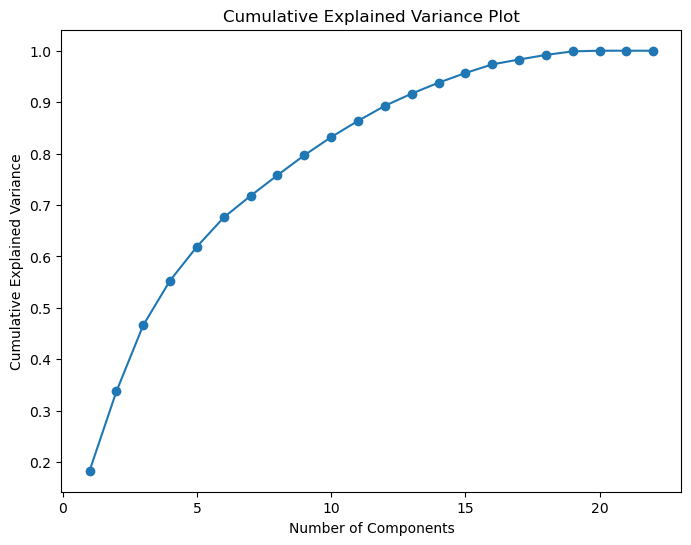

In [13]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
        np.cumsum(pca.explained_variance_ratio_),
        marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()


PCA exp: to retain approximately 90% of the variance in the data we would have to to keep 12 principal components which is excessive. After about 3 PCs, the increase in variance kept is minimal, so we should be fine only looking at 3. overall, the data doesnt cluster well which is kind of expected to see in a real-world data set. im saying there are no outliers. 

In [37]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pc_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

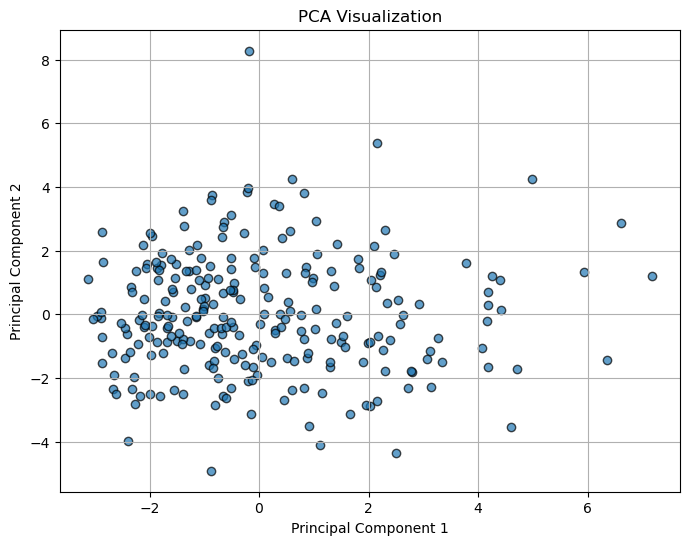

In [38]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], edgecolor='k', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.title('PCA Visualization')
plt.show()

In [15]:
pca = PCA(n_components=5)  # Use more components
pca.fit(X_scaled)
print(pca.explained_variance_ratio_) 

[0.18326779 0.15426145 0.12882411 0.08682034 0.06584124]


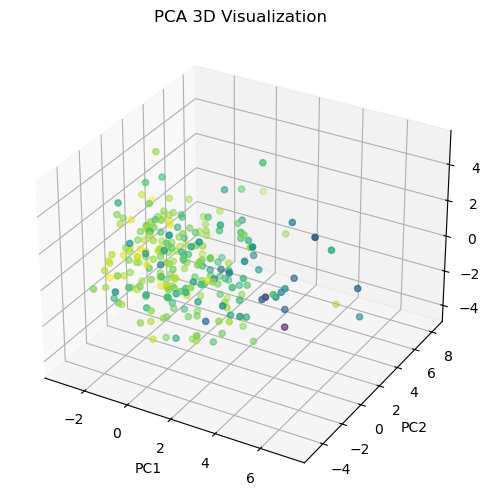

In [16]:
# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
y = df["Happiness"]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Visualization')
plt.show()

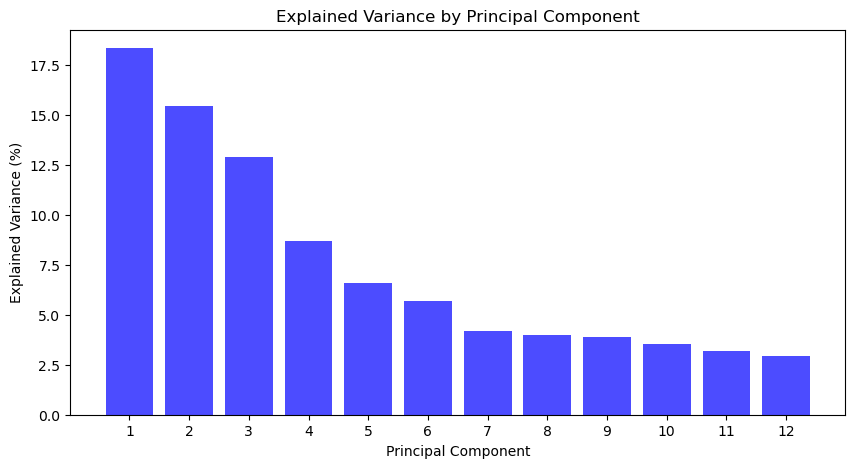

In [17]:
# Apply PCA
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

# Bar plot for explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, 13), explained_variance * 100, alpha=0.7, color="blue")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Explained Variance by Principal Component")
plt.xticks(range(1, 13))
plt.show()


In [18]:
df.describe()

,Gender,ClassYear,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,...,Happiness,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.403162,2.478261,1.735178,0.664032,3.243794,2.209486,-0.000040,6.256917,5.201581,5.371542,...,26.110672,5.569170,24.847708,8.585652,7.866008,25.584585,10.204111,8.217233,7.965929,0.134387
std,0.491505,1.037263,1.536922,0.473264,0.404284,3.240307,0.706828,2.919761,6.000899,5.197327,...,5.488408,4.095119,1.033697,0.943339,1.167788,1.273104,1.401356,1.366785,0.964840,0.341744
min,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,-1.620000,1.000000,0.000000,0.000000,...,0.000000,0.000000,21.800000,5.500000,3.000000,21.500000,5.250000,4.000000,4.950000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,-0.480000,4.000000,1.000000,1.000000,...,24.000000,3.000000,24.200000,8.000000,7.200000,24.880000,9.250000,7.250000,7.430000,0.000000
50%,0.000000,2.000000,2.000000,1.000000,3.300000,1.000000,-0.010000,6.000000,3.000000,4.000000,...,28.000000,5.000000,24.800000,8.500000,7.950000,25.500000,10.250000,8.250000,8.000000,0.000000
75%,1.000000,3.000000,3.000000,1.000000,3.500000,3.000000,0.440000,8.000000,7.000000,8.000000,...,30.000000,8.000000,25.500000,9.150000,8.600000,26.250000,11.000000,9.250000,8.590000,0.000000
max,1.000000,4.000000,5.000000,1.000000,4.000000,20.000000,1.960000,18.000000,35.000000,26.000000,...,35.000000,24.000000,29.100000,12.020000,10.970000,30.250000,15.000000,12.750000,10.620000,1.000000


### Distribution of Happiness Score

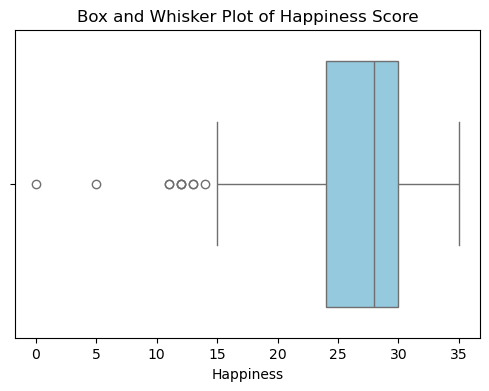

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Happiness', color='skyblue')
plt.title('Box and Whisker Plot of Happiness Score')
plt.xlabel('Happiness')
plt.show()
# check if 0 was an entry error

### Correlation Matrix


In [20]:
# what kind of visualizations should i make? 
# identifying outliers : use PCA, look at PC 1-3, pay attention to the number of variance explained by PC
# visually identify outliers, see if there is a reason it is far off, eliminate if there is an error
# residuals, normally distributed, checking all assumptions of linear regression 
# box plot of happiness score


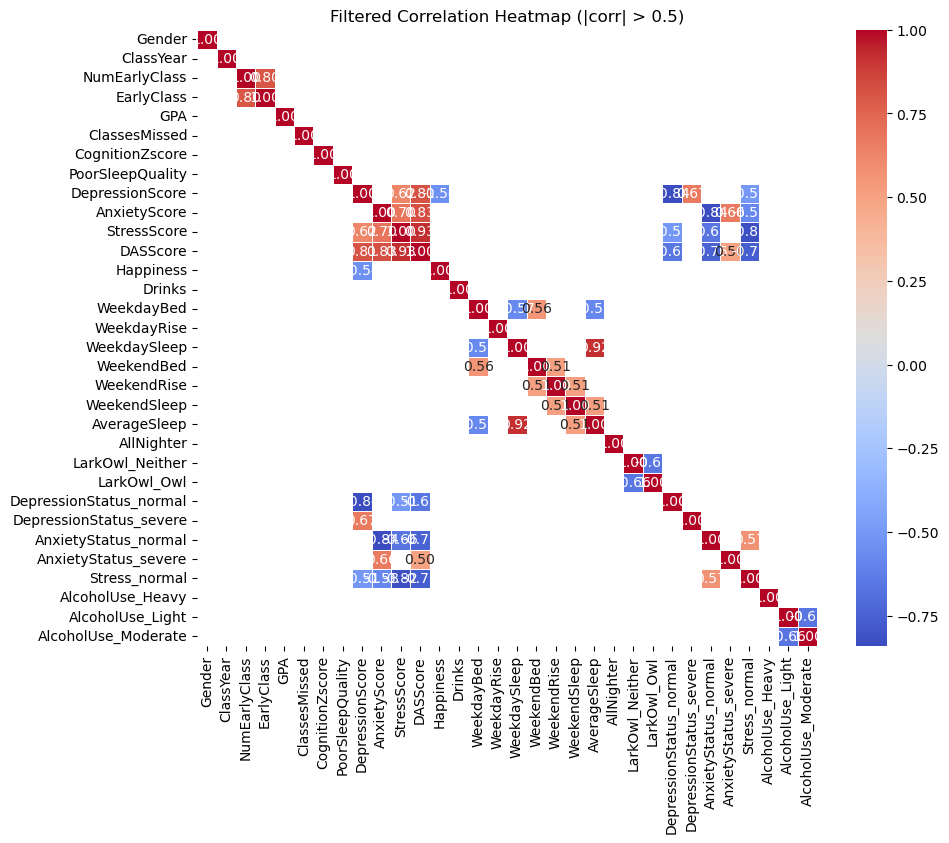

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df.corr()

# Mask values where correlation is below a threshold
threshold = 0.5  # Adjust as needed
mask = np.abs(corr_matrix) < threshold
filtered_corr = corr_matrix.where(~mask, np.nan)

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Filtered Correlation Heatmap (|corr| > 0.5)")
plt.show()



In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Ensure X is a DataFrame to keep column names
# Select only numeric columns
X = df.select_dtypes(include=[float, int])

#X = df.drop(columns=['Happiness'])  # Replace 'y' with the target variable

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns  # Keep column names
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


            Variable           VIF
0             Gender  2.396265e+00
1          ClassYear  8.445269e+00
2      NumEarlyClass  8.055621e+00
3         EarlyClass  9.092693e+00
4                GPA  8.888683e+01
5      ClassesMissed  1.872420e+00
6    CognitionZscore  1.191436e+00
7   PoorSleepQuality  8.944596e+00
8    DepressionScore           inf
9       AnxietyScore           inf
10       StressScore           inf
11          DASScore           inf
12         Happiness  3.701832e+01
13            Drinks  3.952798e+00
14        WeekdayBed  7.511993e+02
15       WeekdayRise  2.748974e+02
16      WeekdaySleep  3.433898e+06
17        WeekendBed  7.663240e+02
18       WeekendRise  1.463753e+02
19      WeekendSleep  6.031969e+05
20      AverageSleep  6.854890e+06
21        AllNighter  1.466054e+00


/Users/noellereid/anaconda3/envs/ds385/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


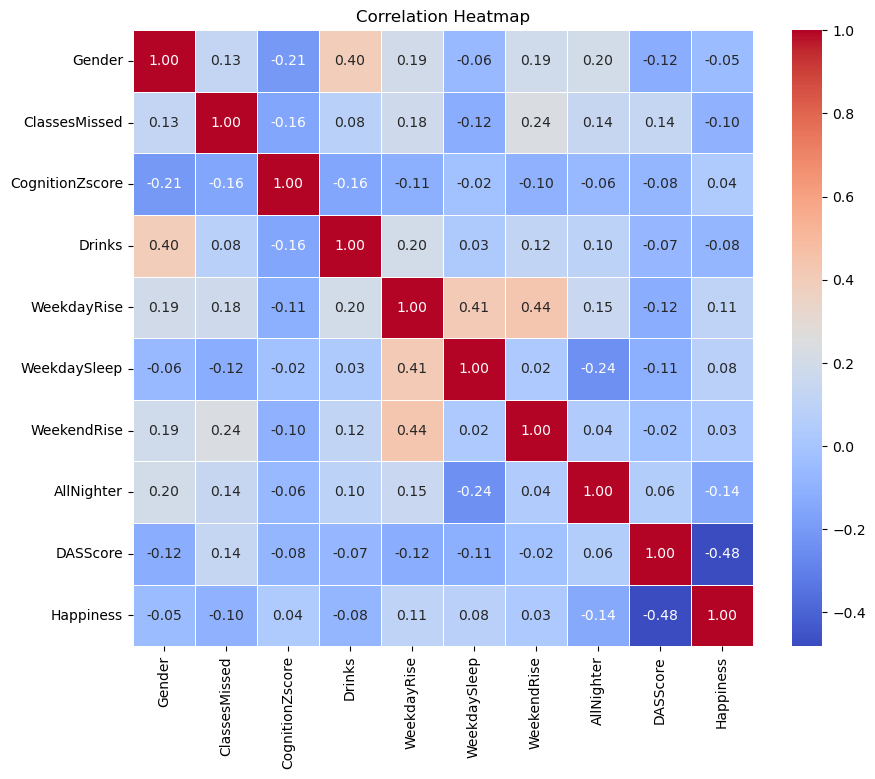

In [23]:
# correlation matrix
# pull necessary cols from dataframe
cols = ['Gender','ClassesMissed','CognitionZscore','Drinks','WeekdayRise','WeekdaySleep','WeekendRise','AllNighter','DASScore','Happiness']
sub_df = df[cols].copy()

# create correlation matrix
corr_mat = sub_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Linear Regression
Assumptions are checked below. We are assuming that each observation is independent of each other because responses are unique to each individual.

In [75]:
# load necessary libraries
from sklearn.metrics import mean_squared_error

In [76]:
# forward stepwise selection algorithm
def forward_stepwise_selection(X, y):
    selected_features = [] # stores chosen features
    remaining_features = list(X.columns) # stores features not yet chosen
    best_mse = float('inf') # initialize best mse to a high value

    while remaining_features:
        scores = []
        for feature in remaining_features:
            candidate_features = selected_features + [feature]

            X_subset = sm.add_constant(X[candidate_features])
            model = sm.OLS(y, X_subset).fit() # fit ols model
            y_pred = model.predict(X_subset) # make predictions
            mse = mean_squared_error(y, y_pred) # calc mse
            scores.append((mse, feature))

        scores.sort() # sort by lowest mse
        best_new_mse, best_new_feature = scores[0] #feature with lowest mse

        if best_new_mse < best_mse: # change this to a limit on mse improvement? maybe model wont have all variables?
            best_mse = best_new_mse
            selected_features.append(best_new_feature)
            remaining_features.remove(best_new_feature)
        else:
            break

    return selected_features

In [77]:
# feature selection
y = df['Happiness']
X = df.drop(columns=['Happiness','DepressionScore','AnxietyScore','StressScore'])
X = X.astype(int)
selected_features = forward_stepwise_selection(X, y)
print("Selected Features: ", selected_features)

Selected Features:  ['DASScore', 'PoorSleepQuality', 'DepressionStatus_severe', 'Drinks', 'AlcoholUse_Heavy', 'WeekdayRise', 'AllNighter', 'WeekdayBed', 'DepressionStatus_normal', 'AverageSleep', 'WeekdaySleep', 'NumEarlyClass', 'AlcoholUse_Moderate', 'WeekendRise', 'WeekendBed', 'WeekendSleep', 'Stress_normal', 'Gender', 'GPA', 'LarkOwl_Owl', 'AnxietyStatus_severe', 'ClassYear', 'CognitionZscore', 'AnxietyStatus_normal', 'LarkOwl_Neither', 'AlcoholUse_Light', 'EarlyClass', 'ClassesMissed']


In [78]:
# new df with just selected features
X_selected = df[selected_features].copy()
# convert boolean columns to numeric
boolean_cols = X_selected.select_dtypes(include=['bool']).columns
X_selected[boolean_cols] = X_selected[boolean_cols].astype(int)

In [89]:
# create model using these features
y = df['Happiness']
X_selected = sm.add_constant(X_selected)
start_time = time.time() # start timer
model = sm.OLS(y.loc[X_selected.index], X_selected).fit()
end_time = time.time() # end timer
total_time = end_time - start_time
print(f"Wall time for fitting the model: {total_time:.4f} seconds")
print(model.summary())

Wall time for fitting the model: 0.0032 seconds
                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     4.105
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.10e-09
Time:                        17:02:23   Log-Likelihood:                -736.86
No. Observations:                 253   AIC:                             1532.
Df Residuals:                     224   BIC:                             1634.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### Linearity & Homoscedasticity (residual plot)

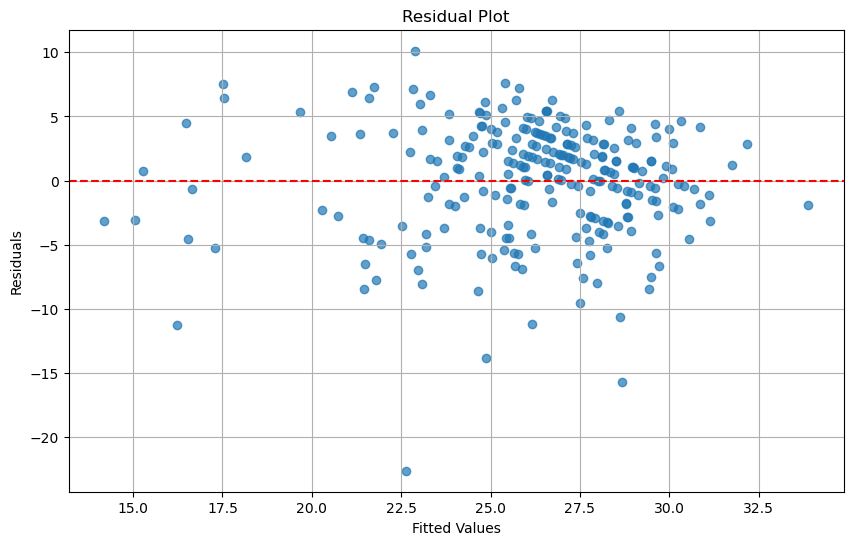

In [81]:
# calc residuals
residuals = model.resid
fitted_vals = model.fittedvalues

# create plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Line at zero for reference
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

### No Multicolinearity (check VIF)

In [84]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
print(vif_data)

                    Feature            VIF
0                     const   14627.594060
1                  DASScore       7.916173
2          PoorSleepQuality       1.630375
3   DepressionStatus_severe       1.701260
4                    Drinks       2.681311
5          AlcoholUse_Heavy       2.631173
6               WeekdayRise      10.439176
7                AllNighter       1.308595
8                WeekdayBed      14.590895
9   DepressionStatus_normal       2.163845
10             AverageSleep  105144.006201
11             WeekdaySleep   78482.967124
12            NumEarlyClass       3.713924
13      AlcoholUse_Moderate       4.616437
14              WeekendRise       6.792559
15               WeekendBed       4.757878
16             WeekendSleep   17206.215142
17            Stress_normal       2.761884
18                   Gender       1.608346
19                      GPA       1.341746
20              LarkOwl_Owl       2.692268
21     AnxietyStatus_severe       1.731956
22         

### Normality (qq plot)

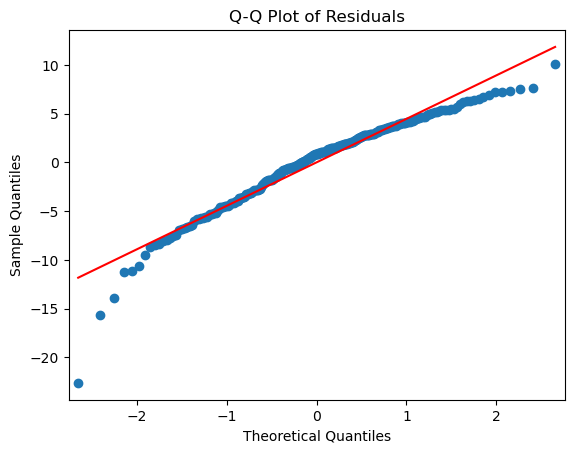

In [85]:
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Neural Network

## Notes:
- change aic to stepwise algorithm
- check 0 happiness 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset